# Imarticus Capstone Project By Saurabh Gupta


# Importing Data and Libraries

In [1]:
#Importing Data and Libraries
import pandas as pd
import numpy as np
lc=pd.read_csv("S:\XYZCorp_LendingData(1).txt",sep = '\t',na_values = 'NaN',low_memory = False)


In [5]:
print(lc.head(4))
print(lc.shape)
y=lc['default_ind']

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   

   int_rate  installment grade sub_grade  ... il_util open_rv_12m open_rv_24m  \
0     10.65       162.87     B        B2  ...     NaN         NaN         NaN   
1     15.27        59.83     C        C4  ...     NaN         NaN         NaN   
2     15.96        84.33     C        C5  ...     NaN         NaN         NaN   
3     13.49       339.31     C        C1  ...     NaN         NaN         NaN   

   max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  \
0         NaN      NaN              NaN    NaN         NaN          NaN   
1         NaN      NaN              NaN    NaN       

# Splitting Data into train and test

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(lc, y, test_size=0.30)
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(599178, 73) (599178,)
(256791, 73) (256791,)


# Exploratory Data Analysis

In [7]:
#Removing Columns
Range_columns = [i for i in range(59,70)]
Train_data_1 = X_train.drop(X_train.columns[Range_columns],axis = 1)
Test_data_1 = X_test.drop(X_test.columns[Range_columns],axis =1)

In [8]:
print("the shape of train data is :" ,Train_data_1.shape)
print("the shape of train data is :" ,Test_data_1.shape)

the shape of train data is : (599178, 62)
the shape of train data is : (256791, 62)


In [10]:
del_columns = ['total_cu_tl','inq_last_12m','annual_inc_joint','dti_joint',
               'verification_status_joint']
Train_data_1 = Train_data_1.drop(labels = del_columns,axis = 1)
Test_data_1 = Test_data_1.drop(labels = del_columns,axis = 1)

In [11]:
drop_more_col = ['open_il_6m']
Train_data_2 = Train_data_1.drop(labels = drop_more_col,axis = 1)
Test_data_2 = Test_data_1.drop(labels = drop_more_col,axis = 1)

In [12]:
print("the shape of train data;",Train_data_2.shape)
print("the shape of test data;",Test_data_2.shape)

the shape of train data; (599178, 56)
the shape of test data; (256791, 56)


In [13]:
mean_train = Train_data_2[['mths_since_last_delinq','mths_since_last_record','revol_util'
                     ,'collections_12_mths_ex_med','mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].mean()
mean_test = Test_data_2[['mths_since_last_delinq','mths_since_last_record','revol_util'
                     ,'collections_12_mths_ex_med','mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].mean()

In [14]:
Train_data_2[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']] = Train_data_2[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].fillna(mean_train)
Test_data_2[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']] = Test_data_2[['mths_since_last_delinq','mths_since_last_record','revol_util','collections_12_mths_ex_med',
             'mths_since_last_major_derog','tot_coll_amt','tot_cur_bal']].fillna(mean_test)

In [15]:
pd.unique(Train_data_2[['term','grade','home_ownership']].values.ravel('K'))
pd.unique(Test_data_2[['term','grade','home_ownership']].values.ravel('K'))

array([' 36 months', ' 60 months', 'B', 'C', 'D', 'A', 'E', 'G', 'F',
       'RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [16]:
Train_data_2['grade'] = Train_data_2['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Train_data_2['home_ownership'] = Train_data_2['home_ownership'].map({'MORTGAGE':6,'RENT':5,'OWN':4,'OTHER':3
                                                                 ,'NONE':2,'ANY':1})

Train_data_2["emp_length"] = Train_data_2["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0','s':''},
                                                            regex = True)

##test
Test_data_2['grade'] = Test_data_2['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})
Test_data_2['home_ownership'] = Test_data_2['home_ownership'].map({'MORTGAGE':6,'RENT':5,'OWN':4,'OTHER':3
                                                                 ,'NONE':2,'ANY':1})

Test_data_2["emp_length"] = Test_data_2["emp_length"].replace({'years':'','year':'',' ':'','<':'','\+':'','n/a':'0','s':''},
                                                            regex = True)

In [17]:
Train_data_2['term'] = Train_data_2['term'].replace({'months':'',' ':''},regex = True)
Test_data_2['term'] = Test_data_2['term'].replace({'months':'',' ':''},regex = True)

In [18]:
print(Train_data_2['emp_length'].value_counts(dropna = False))

10     197360
1       85714
2       53220
3       47411
5       37702
4       35428
7       30280
NaN     30075
8       29658
6       28981
9       23349
Name: emp_length, dtype: int64


In [19]:
Train_data_2['emp_length']= pd.to_numeric(Train_data_2['emp_length'],errors = 'coerce')
Test_data_2['emp_length']= pd.to_numeric(Test_data_2['emp_length'],errors = 'coerce')
mean = Train_data_2['emp_length'].mean()
mean_test = Test_data_2['emp_length'].mean()
Train_data_2['emp_length'] = Train_data_2['emp_length'].fillna(mean)
Test_data_2['emp_length'] = Test_data_2['emp_length'].fillna(mean_test)
Train_data_2['term']= pd.to_numeric(Train_data_2['term'],errors = 'coerce')
Test_data_2['term']= pd.to_numeric(Test_data_2['term'],errors = 'coerce')

# Feature Selection

In [21]:
#feature Selection
features = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','emp_length','home_ownership',
'annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec',
'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','collections_12_mths_ex_med',
'mths_since_last_major_derog','policy_code','acc_now_delinq','tot_coll_amt','tot_cur_bal']
train = Train_data_2[features]
test = Test_data_2[features]

In [22]:
test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal
187717,7500.0,7500.0,7500.0,36,11.14,246.04,6,7.0,5,60000.0,...,0.0,0.0,0.0,2807.89,0.0,44.083487,1.0,0.0,0.0,33912.0
495273,13700.0,13700.0,13700.0,60,12.59,308.85,5,1.0,5,45000.0,...,0.0,0.0,0.0,332.80,0.0,44.083487,1.0,0.0,0.0,40499.0
517597,12000.0,12000.0,12000.0,36,10.99,392.81,6,5.0,6,38000.0,...,0.0,0.0,0.0,392.81,0.0,60.000000,1.0,0.0,4034.0,121095.0
418953,16800.0,16800.0,16800.0,36,11.99,557.93,6,2.0,6,63000.0,...,0.0,0.0,0.0,557.93,0.0,44.083487,1.0,0.0,0.0,216157.0
346762,21750.0,21750.0,21750.0,36,16.29,767.79,4,10.0,6,128200.0,...,0.0,0.0,0.0,20090.10,0.0,58.000000,1.0,0.0,0.0,81877.0


# Random Forest Classification

In [57]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')

In [58]:
select.fit(train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold='median')

In [59]:
X_train_s = select.transform(train)

In [60]:
print('The shape of train is: ', train.shape)
print('The shape of X_train_s is ', X_train_s.shape)

The shape of train is:  (599178, 36)
The shape of X_train_s is  (599178, 18)


In [61]:
X_train_s =pd.DataFrame(X_train_s)

In [62]:
X_train_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,8000.0,8000.0,8000.0,36.0,10.49,259.99,5182.60,5182.60,3635.20,3635.20,2817.40,817.80,0.0,0.0,0.0,259.99,0.0,7267.0
1,21000.0,21000.0,21000.0,60.0,20.99,568.01,20175.95,20175.95,2247.55,2247.55,824.05,1423.50,0.0,0.0,0.0,568.01,0.0,313643.0
2,13800.0,13800.0,13800.0,36.0,8.90,438.20,4612.20,4612.20,10955.00,10955.00,9187.80,1767.20,0.0,0.0,0.0,438.20,0.0,444712.0
3,10000.0,10000.0,10000.0,36.0,10.99,327.34,9764.24,9764.24,315.13,315.13,235.76,79.37,0.0,0.0,0.0,327.34,112.0,27287.0
4,10000.0,10000.0,10000.0,60.0,12.29,223.92,9122.89,9122.89,1560.61,1560.61,877.11,683.50,0.0,0.0,0.0,223.92,0.0,101756.0


In [63]:
train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal
253650,8000.0,8000.0,8000.0,36,10.49,259.99,6,2.0,4,47900.0,...,0.0,0.0,0.0,259.99,0.0,13.000000,1.0,0.0,0.0,7267.0
584010,21000.0,21000.0,21000.0,60,20.99,568.01,3,5.0,6,85000.0,...,0.0,0.0,0.0,568.01,0.0,59.000000,1.0,0.0,0.0,313643.0
52427,13800.0,13800.0,13800.0,36,8.90,438.20,7,7.0,6,60000.0,...,0.0,0.0,0.0,438.20,0.0,39.000000,1.0,0.0,0.0,444712.0
494114,10000.0,10000.0,10000.0,36,10.99,327.34,6,1.0,5,48000.0,...,0.0,0.0,0.0,327.34,0.0,45.000000,1.0,0.0,112.0,27287.0
732309,10000.0,10000.0,10000.0,60,12.29,223.92,5,5.0,5,45000.0,...,0.0,0.0,0.0,223.92,0.0,44.109181,1.0,0.0,0.0,101756.0


[ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True  True False False False False  True  True]


Text(0.5, 0, 'Index of Features')

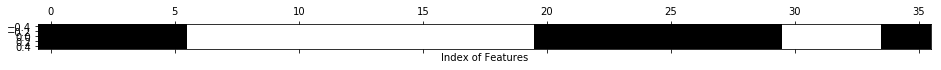

In [64]:
import matplotlib.pyplot as plt
mask = select.get_support()
print(mask)
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Index of Features')

In [65]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_classif
Selector_f = SelectPercentile(f_classif, percentile=25)
Selector_f.fit(train,y_train)

for n,s in zip(train,Selector_f.scores_):
    print('F-score:', (s,n))

C:\Users\Saurabh Gupta\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [32] are constant.
  UserWarning)
C:\Users\Saurabh Gupta\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


F-score: (16.413181516820682, 'loan_amnt')
F-score: (23.12901430907968, 'funded_amnt')
F-score: (45.31975259795728, 'funded_amnt_inv')
F-score: (625.2272036418016, 'term')
F-score: (14812.306056010419, 'int_rate')
F-score: (9.300231133384154, 'installment')
F-score: (9339.229597699246, 'grade')
F-score: (105.4136765183886, 'emp_length')
F-score: (220.49116985892073, 'home_ownership')
F-score: (782.9154560984659, 'annual_inc')
F-score: (6.9034912247148075, 'dti')
F-score: (60.27347117621261, 'delinq_2yrs')
F-score: (3362.530712095092, 'inq_last_6mths')
F-score: (1.488617030312238, 'mths_since_last_delinq')
F-score: (306.3167076700082, 'mths_since_last_record')
F-score: (279.1596226299355, 'open_acc')
F-score: (250.32876354490753, 'pub_rec')
F-score: (266.3785707727901, 'revol_bal')
F-score: (1181.9835113566942, 'revol_util')
F-score: (257.0788506128066, 'total_acc')
F-score: (32450.020302320205, 'out_prncp')
F-score: (32449.544800335883, 'out_prncp_inv')
F-score: (931.0629294764716, 'to

# Logistic Regression

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [24]:
features = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','out_prncp',
            'out_prncp_inv','total_pymnt',
 'total_pymnt_inv','total_rec_prncp',
'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
 'last_pymnt_amnt','tot_cur_bal']

In [25]:
Final_train = Train_data_2[features]
Final_test = Test_data_2[features]

In [27]:
y_train.shape

(599178,)

In [28]:
Final_train.shape

(599178, 18)

In [31]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(Final_train,y_train,random_state = 42,test_size = 0.3)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train1,y_train1)

C:\Users\Saurabh Gupta\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = logreg.predict(X_test1)

In [36]:
logreg.score(X_test1,y_test1)

0.9977024155234376

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
print("confusion matrix is: {}".format(confusion_matrix(y_test1,y_pred)))

confusion matrix is: [[169839      5]
 [   408   9502]]


In [39]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169844
           1       1.00      0.96      0.98      9910

   micro avg       1.00      1.00      1.00    179754
   macro avg       1.00      0.98      0.99    179754
weighted avg       1.00      1.00      1.00    179754



In [40]:
#plotting the roc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

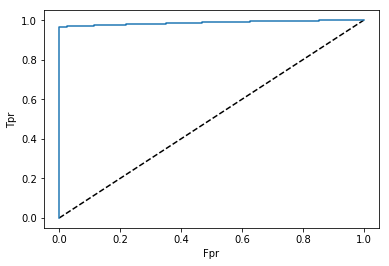

In [41]:
y_pred_prob = logreg.predict_proba(X_test1)[:,1]
fpr,tpr,threshold = roc_curve(y_test1,y_pred_prob)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')

In [42]:
roc_auc_score(y_test1,y_pred_prob)

0.987686109822723

In [43]:
#predicting on the final test values
logreg.predict(Final_test)[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [44]:
Predict_finaltest = logreg.predict_proba(Final_test)[:,1]
print("The probability of the coming 1 on the final_tes is :{}".format(Predict_finaltest,2))

The probability of the coming 1 on the final_tes is :[5.69948607e-07 5.98333912e-04 2.56170542e-04 ... 5.01892091e-05
 2.07613474e-25 5.99070912e-13]


In [45]:
roc_auc_score(y_test,Predict_finaltest)

0.9881555378324336

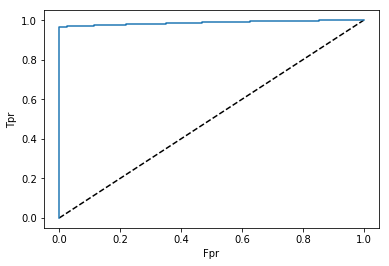

In [46]:
Predict_finaltest = logreg.predict_proba(Final_test)[:,1]
roc_curve(y_test,Predict_finaltest)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'logistic regression')

# Knn Classification

In [52]:
#knn classification
from sklearn.neighbors import KNeighborsClassifier
X_train1,X_test1,y_train1,y_test1 = train_test_split(Final_train,y_train,random_state = 42,test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1,y_train1)
y_pred = knn.predict(X_test1)
knn.score(X_test1,y_test1)

0.9957664363519032

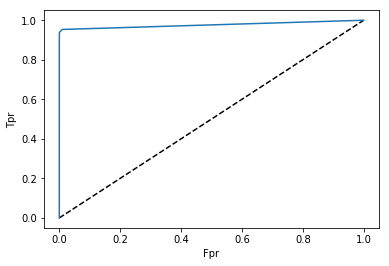

In [53]:
knn_predict = knn.predict_proba(X_test1)[:,1]
fpr,tpr,threshold = roc_curve(y_test1,knn_predict)
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'knn')

In [54]:
#predicting on the final test set uning knn..
y_pred = knn.predict(Final_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
pred = knn.predict_proba(Final_test)[:,1]

In [56]:
roc_auc_score(y_test,pred)

0.9781692320503372